In [9]:
from scipy.io import wavfile

wav_data = wavfile.read('../data/pee_wees_playhouse_01_01.wav')

In [10]:
sample_rate = wav_data[0]
data = wav_data[1]
wav_data
#Sample rates are usually measured per second, using kilohertz (kHz) or cycles per second. 
#CDs are usually recorded at 44.1kHz - which means that every second, 
#44,100 samples were taken. 

(44100,
 array([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int16))

In [11]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data, columns=['samples', 'channels'])
df.dtypes
# 16 bit integer PCM

samples     int16
channels    int16
dtype: object

In [12]:
print((data.shape[0] / sample_rate) / 60, 'min')

24.369500000000002 min


In [78]:
# put into time series
#df.plot()
import datetime
from ipywidgets import IntProgress
from IPython.display import display as d

a = []
sample_size = 1440


for i in range(1, int(len(data) / sample_size)):
    v = sample_size * i 
    samples_avg = df.values[v - sample_size:v, 0].mean()
    silences_avg = df.values[v - sample_size:v, 1].mean()
    
    a.append([samples_avg, silences_avg])
    
a[0], a[5000]



AttributeError: 'numpy.ndarray' object has no attribute 'median'

In [122]:

stddevs = []

for i in range(1, int(len(data) / sample_size)):
    v = sample_size * i 
    #samps = df.values[v - sample_size:v, 0]

    samples_std = df.values[v - sample_size:v, 0].std()
    silences_avg = df.values[v - sample_size:v, 1].std()
    
    stddevs.append([samples_avg, silences_avg])
    
stddevs[0], stddevs[5000]

([5157.091323315247, 0.0], [5157.091323315247, 194.91233730005607])

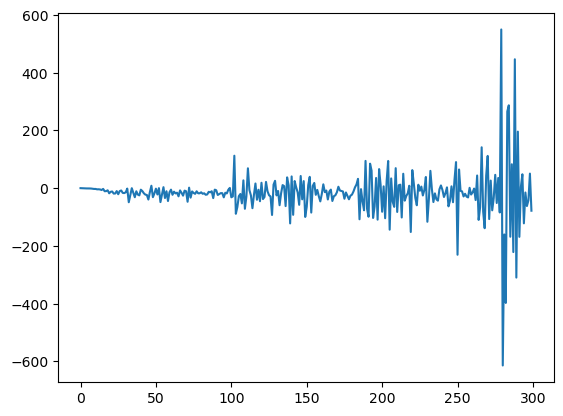

In [126]:
import matplotlib.pyplot as plt

avgs = pd.DataFrame(a, columns=['samples', 'silences'])
(avgs.silences[0:60*5]).plot()
plt.show()

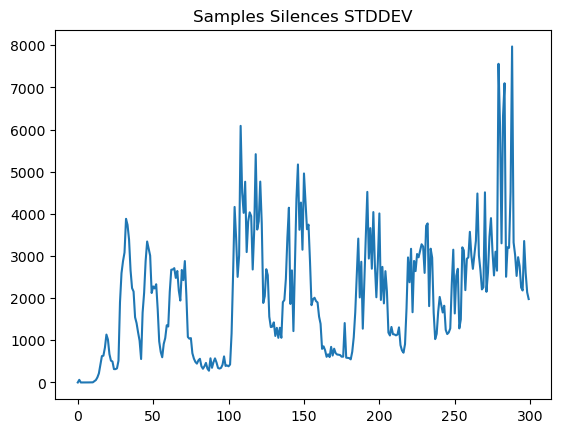

In [156]:
stddev_avgs = pd.DataFrame(stddevs, columns=['samples', 'silences'])
(stddev_avgs.silences[0:60*5]).plot()
plt.title('Samples Silences STDDEV')
plt.show()

In [129]:
meds = []

for i in range(1, int(len(data) / sample_size)):
    v = sample_size * i 
    samples_avg = np.median(df.values[v - sample_size:v, 0])
    silences_avg = np.median(df.values[v - sample_size:v, 1])
    
    meds.append([samples_avg, silences_avg])
    
print(meds[0], meds[5000])

[0.0, 0.0] [-6.5, -6.5]


<AxesSubplot:>

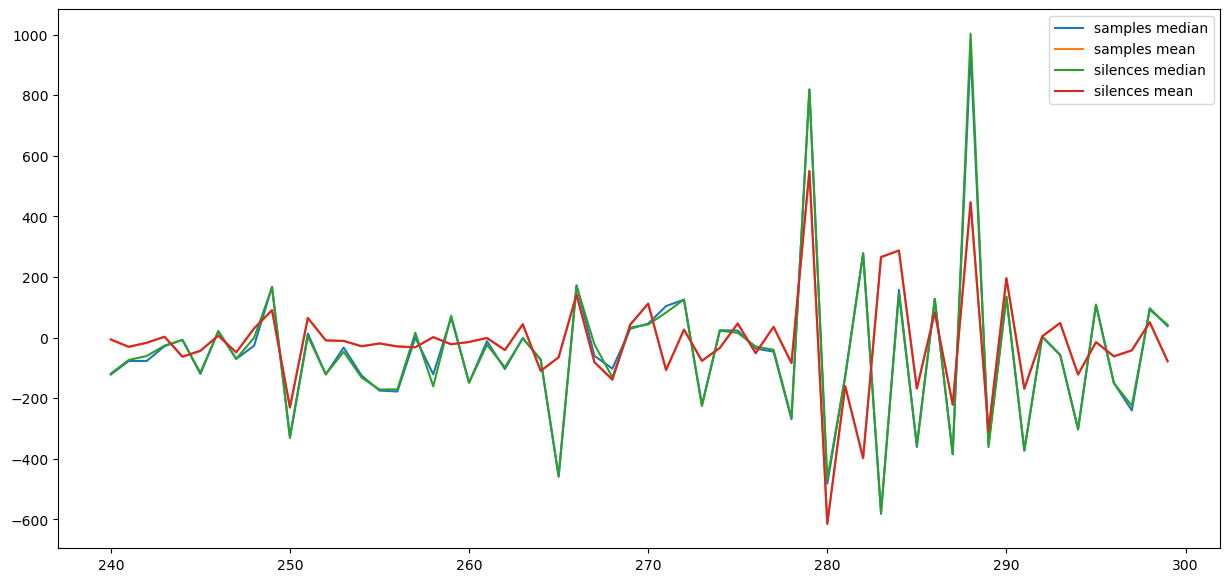

In [157]:
meds_avgs = pd.DataFrame(meds, columns=['samples', 'silences'])
(meds_avgs.samples[60*4:60*5]).plot(label='samples median', figsize=(15, 7))
(avgs.samples[60*4:60*5]).plot(label='samples mean')
(meds_avgs.silences[60*4:60*5]).plot(label='silences median')
(avgs.silences[60*4:60*5]).plot(label='silences mean')
plt.legend()
plt.show()

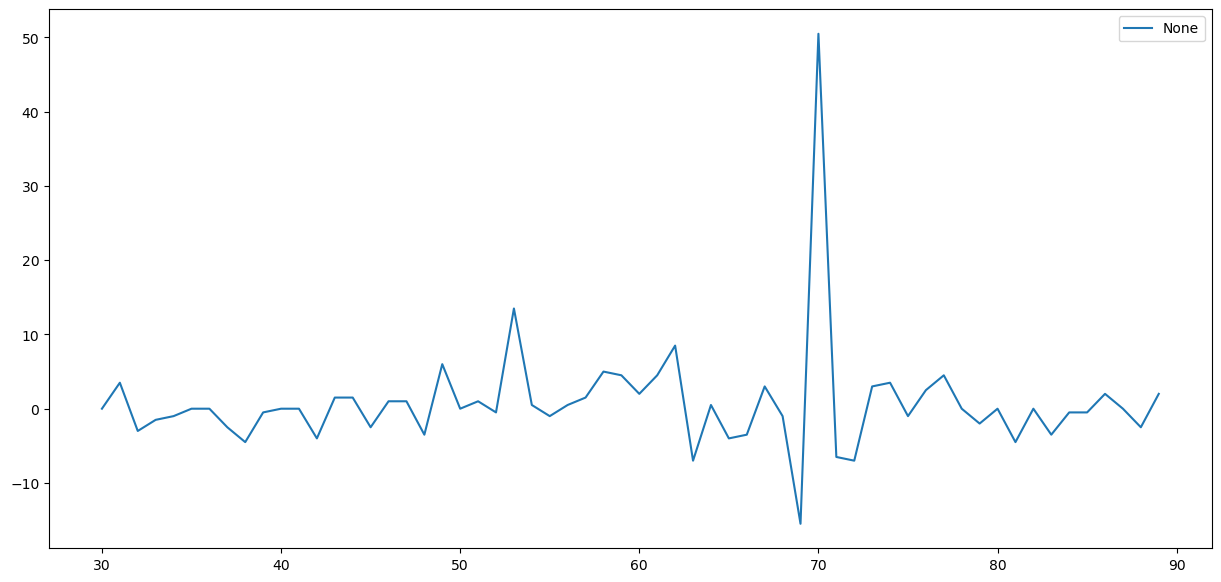

In [168]:
(meds_avgs.samples[30:90] - meds_avgs.silences[30:90]).plot(figsize=(15, 7))
plt.legend()
plt.show()

# samples / silences

In [163]:
import plotly

<module 'plotly' from '/Users/chameleon/miniconda/envs/py37/lib/python3.7/site-packages/plotly/__init__.py'>